In [1]:
# ANALYZING THE INTERSECTION OF HOUSING AFFORDABILITY AND TRANSIT ACCESS 
# FOR HISPANIC COMMUNITIES IN WASHINGTON, D.C.

# This project investigates whether Washington, D.C.’s affordable housing developments and public transit 
# infrastructure equitably serve Hispanic communities by analyzing spatial data at the census block group level. 
# Using a combination of demographic, transit, and housing datasets, the study calculates Hispanic population 
# percentages, counts affordable housing units by Area Median Income (AMI) tiers, and measures access to 
# high-frequency transit. 

# Through spatial joins and bivariate choropleth mapping, the analysis reveals a 
# significant mismatch: neighborhoods with high Hispanic populations tend to have fewer affordable housing units 
# and are largely excluded from Metrorail access, relying instead on less frequent bus service. These disparities 
# suggest systemic underinvestment and spatial inequity, emphasizing the need for more intentional alignment 
# between housing policy and community need.

In [2]:
# 1. First Install necessary packages

# To modify and organize tabular data (Hispanic Population from NHGIS CSV file)
!pip install pandas 

# To perform Spatial Join to merge the CSV to the Census Block Group shapefile
!pip install geopandas 

# To create charts and plot static maps
!pip install matplotlib 

# To build spatial weights matrix 
!pip install libpysal 

# For bivariate Mapping
!pip install -U spopt 

# (Abandoned) To create an interactive map
!pip install folium 

# To add a base map in the background of bivariate maps
!pip install contextily 

# To impute the missing or inaccurate data and to classify them for bivariate mapping
!pip install numpy 

#(Abondoned)
!pip install scikit-learn 

# To classify the variables in Natural Breaks
!pip install mapclassify 

# For bivariate mapping
!pip install spopt 

# To make the scatter plot
!pip install seaborn 

# To calculate the peasrson correlation Coefficient and the P-Value
!pip install scipy 

In [3]:
# 2. Import libraries
import pandas as pd
import os

# Import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# 3. Check the directory Folder and files, to verify the files are there to be used for future codes.
os.getcwd()
os.listdir()

['US_blck_grp_2023.sbx',
 'Washington_DC_Boundary.prj',
 'US_blck_grp_2023.shx',
 'dc_cbg_transit_affordable_map.png',
 'US_blck_grp_2023.cpg',
 'US_blck_grp_2023.shp',
 'scatter_plot_ami30.png',
 'Affordable_Housing.shp',
 'Affordable_Housing.cpg',
 'aggregated_stop_loading.shp.xml',
 'bivar_map_ami81_up.png',
 'wdc_cbg_2023_aff_hous_transit_sjoin.geojson',
 'Affordable_Housing.shx',
 'aggregated_stop_loading.sbn',
 'scatter_plot_total.png',
 'aggregated_stop_loading.prj',
 'scatter_plot_ami80.png',
 'Affordable_Housing.dbf',
 'US_blck_grp_2023.dbf',
 'bivar_map_ami60.png',
 'scatter_plot_ami81_up.png',
 'Affordable_Housing.xml',
 'scatter_plot_transit_train.png',
 '__pycache__',
 'scatter_plot_ami50.png',
 'scatter_plot_transit_bus.png',
 'US_blck_grp_2023.shp.xml',
 'US_blck_grp_2023.sbn',
 'scatter_plot_ami60.png',
 'Washington_DC_Boundary.cpg',
 'Washington_DC_Boundary.shp',
 'nhgis0014_ds267_20235_blck_grp_codebook.txt',
 'bivar_map_ami50.png',
 'data_prep.py',
 'Washington_DC_Bo

In [5]:
#Import the CSV file of ACS 2023 from NHGIS and relabel them based on the label row

# 4. Load the CSV file without header
hisp_pop_cbg_2023_df = pd.read_csv('hisp_pop_cbg_2023.csv', header=None)

# 5. Get row 1 to use as new column names
new_column_names = hisp_pop_cbg_2023_df.iloc[1].copy()

# 6. Set the header as row 1
hisp_pop_cbg_2023_df.columns = hisp_pop_cbg_2023_df.iloc[1]
hisp_pop_cbg_2023_df = hisp_pop_cbg_2023_df.drop(index=1).reset_index(drop=True)

# 7. Assign new headers
hisp_pop_cbg_2023_df.columns = new_column_names

# 8. Drop row 0 and 1
hisp_pop_cbg_2023_df = hisp_pop_cbg_2023_df.drop(index=[0, 1]).reset_index(drop=True)

# 9. Rename "GIS Join Match Code" to "GISJOIN"
hisp_pop_cbg_2023_df = hisp_pop_cbg_2023_df.rename(columns={"GIS Join Match Code": "GISJOIN"})

# 10. Reset index
hisp_pop_cbg_2023_df = hisp_pop_cbg_2023_df.reset_index()

In [6]:
# Preview the DataFrame
hisp_pop_cbg_2023_df.head()

1  index          GISJOIN Data File Year State Postal Abbreviation  \
0      0  G11000100001021      2019-2023                        DC   
1      1  G11000100001022      2019-2023                        DC   
2      2  G11000100001023      2019-2023                        DC   
3      3  G11000100002011      2019-2023                        DC   
4      4  G11000100002012      2019-2023                        DC   

1 Region Code Division Code            State Name State Code  \
0         NaN           NaN  District of Columbia         11   
1         NaN           NaN  District of Columbia         11   
2         NaN           NaN  District of Columbia         11   
3         NaN           NaN  District of Columbia         11   
4         NaN           NaN  District of Columbia         11   

1           County Name County Code  ...  \
0  District of Columbia           1  ...   
1  District of Columbia           1  ...   
2  District of Columbia           1  ...   
3  District of Columbia           1  ...   
4  District of Columbia           1  ...   

1 Margins of error: Hispanic or Latino: Asian alone  \
0                                                14   
1                                                14   
2                                                14   
3                                                14   
4                                                14   

1 Margins of error: Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone  \
0                                                 14                                       
1                                                 14                                       
2                                                 14                                       
3                                                 14                                       
4                                                 14                                       

1 Margins of error: Hispanic or Latino: Some other race alone  \
0                                                 44            
1                                                 14            
2                                                 14            
3                                                 14            
4                                                 59            

1 Margins of error: Hispanic or Latino: Two or more races  \
0                                                 14        
1                                                 77        
2                                                175        
3                                                 14        
4                                                 60        

1 Margins of error: Hispanic or Latino: Two or more races: Two races including Some other race  \
0                                                 14                                             
1                                                 77                                             
2                                                175                                             
3                                                 14                                             
4                                                 61                                             

1 Margins of error: Hispanic or Latino: Two or more races: Two races excluding Some other race, and three or more races  \
0                                                 14                                                                      
1                                                 14                                                                      
2                                                 14                                                                      
3                                                 14                                                                      
4                                                  9                               

In [7]:
# 10. Load the shapefile of the 2023 ACS census block groups from NHGIS
wdc_cbg_2023_gdf = gpd.read_file('US_blck_grp_2023.shp')

# Filter only for Washington, D.C. (STATEFP == '11')
wdc_cbg_2023_gdf = wdc_cbg_2023_gdf[wdc_cbg_2023_gdf['STATEFP'] == "11"].reset_index(drop=True)


In [8]:
# View the first few rows
wdc_cbg_2023_gdf.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G11000100001011      11      001  000101        1  110010001011   
1  G11000100001021      11      001  000102        1  110010001021   
2  G11000100001022      11      001  000102        2  110010001022   
3  G11000100001023      11      001  000102        3  110010001023   
4  G11000100002011      11      001  000201        1  110010002011   

                 GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT     ALAND    AWATER  \
0  1500000US110010001011  Block Group 1  G5030        S  199776.0    5261.0   
1  1500000US110010001021  Block Group 1  G5030        S  803207.0   14766.0   
2  1500000US110010001022  Block Group 2  G5030        S  194350.0       0.0   
3  1500000US110010001023  Block Group 3  G5030        S  708927.0  501899.0   
4  1500000US110010002011  Block Group 1  G5030        S  209083.0       0.0   

    Shape_Leng    Shape_Area  ORIG_FID  \
0  2168.888992  2.050374e+05    188086   
1  4174.028929  8.179739e+05    188100   
2  1868.637743  1.943491e+05    188450   
3  5749.570090  1.210823e+06    188069   
4  2178.615900  2.090829e+05    188203   

                                            geometry  
0  POLYGON ((1617190.956 319768.299, 1617195.735 ...  
1  POLYGON ((1616323.395 320517.065, 1616329.104 ...  
2  POLYGON ((1616645.642 319435.939, 1616619.896 ...  
3  POLYGON ((1616838.196 319196.058, 1616829.863 ...  
4  POLYGON ((1614912.865 318973.807, 1614883.374 ...

In [9]:
# 11. Call the function join_df_to_gdf(df, gdf, label) 

# from the module data_prep.py 
import data_prep

# Now call the function
wdc_cbg_2023_gdf_merged = data_prep.join_df_to_gdf(hisp_pop_cbg_2023_df, wdc_cbg_2023_gdf, "GISJOIN")

In [10]:
# View the first few rows
wdc_cbg_2023_gdf_merged

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0    G11000100001011      11      001  000101        1  110010001011   
1    G11000100001021      11      001  000102        1  110010001021   
2    G11000100001022      11      001  000102        2  110010001022   
3    G11000100001023      11      001  000102        3  110010001023   
4    G11000100002011      11      001  000201        1  110010002011   
..               ...     ...      ...     ...      ...           ...   
566  G11000100110022      11      001  011002        2  110010110022   
567  G11000100111001      11      001  011100        1  110010111001   
568  G11000100111002      11      001  011100        2  110010111002   
569  G11000100111003      11      001  011100        3  110010111003   
570  G11000109800001      11      001  980000        1  110019800001   

                   GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  ...  \
0    1500000US110010001011  Block Group 1  G5030        S  ...   
1    1500000US110010001021  Block Group 1  G5030        S  ...   
2    1500000US110010001022  Block Group 2  G5030        S  ...   
3    1500000US110010001023  Block Group 3  G5030        S  ...   
4    1500000US110010002011  Block Group 1  G5030        S  ...   
..                     ...            ...    ...      ...  ...   
566  1500000US110010110022  Block Group 2  G5030        S  ...   
567  1500000US110010111001  Block Group 1  G5030        S  ...   
568  1500000US110010111002  Block Group 2  G5030        S  ...   
569  1500000US110010111003  Block Group 3  G5030        S  ...   
570  1500000US110019800001  Block Group 1  G5030        S  ...   

     Margins of error: Hispanic or Latino: Asian alone  \
0                                                  NaN   
1                                                   14   
2                                                   14   
3                                                   14   
4                                                   14   
..                                                 ...   
566                                                 14   
567                                                 14   
568                                                 14   
569                                                 14   
570                                                 14   

     Margins of error: Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone  \
0                                                  NaN                                        
1                                                   14                                        
2                                                   14                                        
3                                                   14                                        
4                                                   14                                        
..                                                 ...                                        
566                                                 14                                        
567                                                 14                                        
568                                                 14                                        
569                                                 14                                        
570                                                 14                                        

     Margins of error: Hispanic or Latino: Some other race alone  \
0                                                  NaN             
1                                                   44             
2                                                   14             
3                                                   14             
4                                                   14             
..                                                 ...             
566                                      

In [11]:
# 12. Load transit stops shapefile *USED TRANSIT FREQUENCY DATA JUST IN CASE OF FURTHER ANALYSIS IN THE FUTURE
transit_stops_frequency = gpd.read_file('aggregated_stop_loading.shp')

# Check results
print(transit_stops_frequency.shape)
transit_stops_frequency.head()

(6232, 26)


r  r_bus  r_rail  r_other  r_wd  r_wd_bus  r_wd_rail  r_wd_other  r_we  \
0   7      7       0        0     7         7          0           0     1   
1  10      8       2        0    10         8          2           0     8   
2   4      4       0        0     0         0          0           0     4   
3   8      8       0        0     4         4          0           0     4   
4   8      8       0        0     4         4          0           0     4   

   r_we_bus  ...   f_wd  f_wd_bus  f_wd_rail  f_wd_other   f_we  f_we_bus  \
0         1  ...   90.2      90.2        0.0         0.0   16.0      16.0   
1         6  ...  628.3     376.2      252.1         0.0  323.1     178.6   
2         4  ...    0.0       0.0        0.0         0.0   38.0      38.0   
3         4  ...   42.0      42.0        0.0         0.0   38.0      38.0   
4         4  ...   42.0      42.0        0.0         0.0   38.0      38.0   

   f_we_rail  f_we_other  providers                    geometry  
0        0.0         0.0          3  POINT (-76.89233 39.00695)  
1      144.5         0.0          3  POINT (-76.92769 38.97821)  
2        0.0         0.0          2  POINT (-76.91567 39.02886)  
3        0.0         0.0          3  POINT (-76.91504 39.02448)  
4        0.0         0.0          3  POINT (-76.90945 39.02316)  

[5 rows x 26 columns]

In [12]:
# 13. Load Washington DC boundary shapefile to clip only DC data
dc_boundary = gpd.read_file('Washington_DC_Boundary.shp')

#Check resultS
print(dc_boundary.shape)
dc_boundary.head()

(1, 16)


OBJECTID   CITY_NAME  STATE_CITY CAPITAL            WEB_URL  AREAKM  \
0         1  Washington     1150000       Y  http://www.dc.gov  177.47   

   AREAMILES       GIS_ID                                GLOBALID CREATOR  \
0      68.52  DCBndyPly_1  {ED39E1E0-B1E5-4B42-BE73-1C737B39E5CA}    None   

  CREATED EDITOR EDITED  SHAPEAREA  SHAPELEN  \
0    None   None   None          0         0   

                                            geometry  
0  POLYGON ((-8584936.334 4712272.261, -8584936.2...

In [13]:
# 14. Load Affordable_Housing shapefile downloaded from DC opendata
affordable_housing = gpd.read_file('Affordable_Housing.shp')

In [14]:
# 15. Make sure the coordinate system is same accross the gdf s

# Used the UTM system in case of distance analysis 

wdc_cbg_2023_gdf_merged = wdc_cbg_2023_gdf_merged.to_crs(epsg=3857)
transit_stops_frequency = transit_stops_frequency.to_crs(epsg=3857)
affordable_housing = affordable_housing.to_crs(epsg=3857)
dc_boundary = dc_boundary.to_crs(epsg=3857)

In [15]:
# 16. Clip the transit_stops_frequency to dc_boundary
transit_stops_frequency_clipped = gpd.clip(transit_stops_frequency, dc_boundary)

#Check resultS
transit_stops_frequency_clipped.head()

r  r_bus  r_rail  r_other  r_wd  r_wd_bus  r_wd_rail  r_wd_other  r_we  \
5553  2      2       0        0     2         2          0           0     1   
3151  4      4       0        0     4         4          0           0     2   
5550  1      1       0        0     1         1          0           0     0   
4478  2      2       0        0     2         2          0           0     1   
4481  4      4       0        0     4         4          0           0     2   

      r_we_bus  ...   f_wd  f_wd_bus  f_wd_rail  f_wd_other  f_we  f_we_bus  \
5553         1  ...  126.3     126.3        0.0         0.0  79.6      79.6   
3151         2  ...  126.2     126.2        0.0         0.0  79.7      79.7   
5550         0  ...   18.0      18.0        0.0         0.0   0.0       0.0   
4478         1  ...  158.1     158.1        0.0         0.0  81.6      81.6   
4481         2  ...  126.2     126.2        0.0         0.0  79.7      79.7   

      f_we_rail  f_we_other  providers                          geometry  
5553        0.0         0.0          1  POINT (-8573196.626 4695352.858)  
3151        0.0         0.0          1  POINT (-8573596.222 4695376.021)  
5550        0.0         0.0          1  POINT (-8573681.577 4695762.167)  
4478        0.0         0.0          1  POINT (-8572805.948 4695868.449)  
4481        0.0         0.0          1  POINT (-8573449.718 4695951.567)  

[5 rows x 26 columns]

/var/folders/b4/kshvmhdn1_b7_gv125mt01180000gn/T/ipykernel_5085/2058150166.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10)


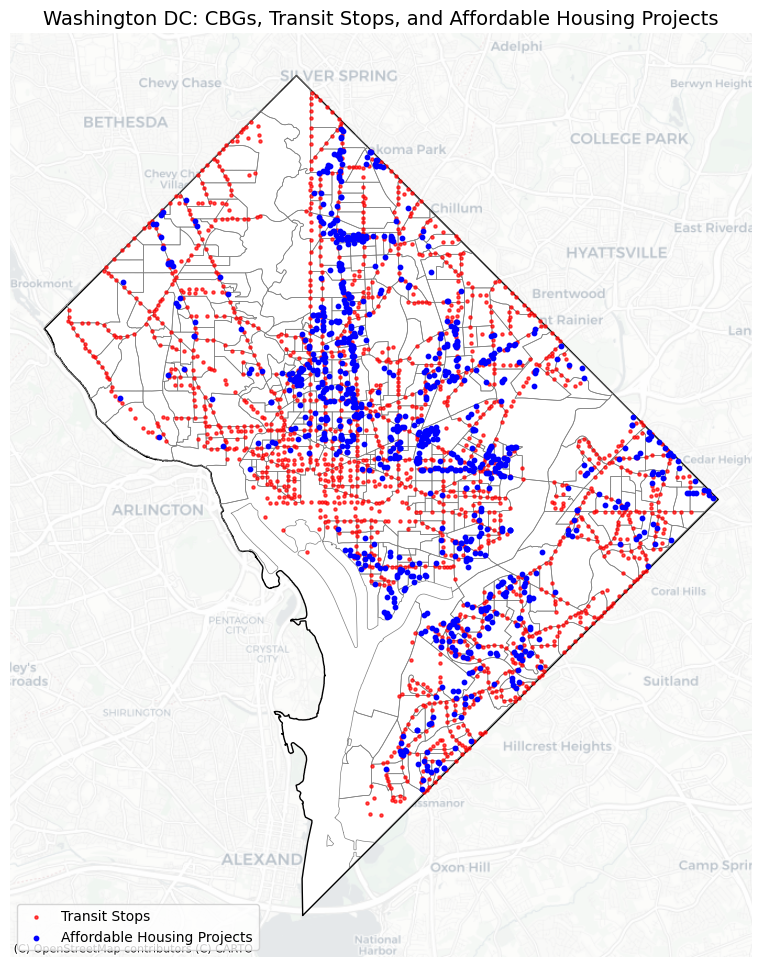

In [16]:
# Now plot the data to check that everything is in its place

# import matplotlib.pyplot as plt
import contextily as ctx

# Reproject all GeoDataFrames to EPSG:3857 for basemap compatibility
dc_boundary_web = dc_boundary.to_crs(epsg=3857)
wdc_cbg_web = wdc_cbg_2023_gdf_merged.to_crs(epsg=3857)
transit_stops_web = transit_stops_frequency_clipped.to_crs(epsg=3857)
affordable_housing_web = affordable_housing.to_crs(epsg=3857)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot base layers
dc_boundary_web.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='DC Boundary')
wdc_cbg_web.plot(ax=ax, facecolor="none", edgecolor="gray", linewidth=0.5, label='Census Block Groups')

# Plot point layers
transit_stops_web.plot(ax=ax, markersize=5, color='red', alpha=0.7, label='Transit Stops')
affordable_housing_web.plot(ax=ax, markersize=10, color='blue', alpha=1, label='Affordable Housing Projects')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.6)

# Add title and legend
ax.set_title('Washington DC: CBGs, Transit Stops, and Affordable Housing Projects', fontsize=14)
ax.legend(loc='lower left', fontsize=10)

# Remove axis
ax.set_axis_off()

# Save to file
plt.savefig("dc_cbg_transit_affordable_map.png", dpi=300, bbox_inches='tight')
plt.show()


In [17]:
# 17. List the column names of affordable_housing for relabeling
affordable_housing.columns.tolist()

['OBJECTID',
 'MAR_WARD',
 'ADDRESS',
 'PROJECT_NA',
 'STATUS_PUB',
 'AGENCY_CAL',
 'TOTAL_AFFO',
 'LATITUDE',
 'LONGITUDE',
 'AFFORDABLE',
 'AFFORDAB_1',
 'AFFORDAB_2',
 'AFFORDAB_3',
 'AFFORDAB_4',
 'CASE_ID',
 'MAR_ID',
 'XCOORD',
 'YCOORD',
 'FULLADDRES',
 'GIS_LAST_M',
 'geometry']

In [18]:
# 18. Rename specific columns
affordable_housing = affordable_housing.rename(columns={
    'MAR_WARD': "Ward Number",
    'PROJECT_NA': "Project Name",
    'STATUS_PUB': "Project Status",
    'AGENCY_CAL': "Agency Name",
    'TOTAL_AFFO': "Total Number of Affordable Housing Units",
    'AFFORDABLE': "Number of Affordable Housing Units with 30% AMI or Lower",
    'AFFORDAB_1': "Number of Affordable Housing Units with 31-50% AMI",
    'AFFORDAB_2': "Number of Affordable Housing Units with 51-60% AMI",
    'AFFORDAB_3': "Number of Affordable Housing Units with 61-80% AMI",
    'AFFORDAB_4': "Number of Affordable Housing Units with 81% AMI or Higher"
})

# Check results
affordable_housing.head()

OBJECTID Ward Number                                            ADDRESS  \
0    119968      Ward 5  1122 Bladensburg Road Northeast, Washington, D...   
1    120961      Ward 6  1101 Pennsylvania Avenue Southeast, Washington...   
2    120962      Ward 8  1928 Naylor Road Southeast, Washington, Distri...   
3    120963      Ward 6  1339 E Street Southeast, Washington, District ...   
4    120964      Ward 6  1720 New Jersey Avenue Northwest, Washington, ...   

                  Project Name          Project Status Agency Name  \
0  1122-1124 Bladensburg Rd NE  Completed 2015 to Date        DHCD   
1                      Penn 11  Completed 2015 to Date        DHCD   
2                        MEDES  Completed 2015 to Date        DHCD   
3          Lockwood Apartments  Completed 2015 to Date     DHCD OP   
4                   The Hoxton  Completed 2015 to Date        DHCD   

   Total Number of Affordable Housing Units   LATITUDE  LONGITUDE  \
0                                         4  38.904778 -76.980637   
1                                         3  38.882384 -76.991329   
2                                         3  38.872759 -76.976639   
3                                        13  38.882642 -76.986649   
4                                         1  38.913194 -77.017960   

   Number of Affordable Housing Units with 30% AMI or Lower  ...  \
0                                                  0         ...   
1                                                  0         ...   
2                                                  0         ...   
3                                                  0         ...   
4                                                  0         ...   

   Number of Affordable Housing Units with 51-60% AMI  \
0                                                  3    
1                                                  0    
2                                                  3    
3                                                  0    
4                                                  0    

   Number of Affordable Housing Units with 61-80% AMI  \
0                                                  0    
1                                                  1    
2                                                  0    
3                                                  5    
4                                                  0    

   Number of Affordable Housing Units with 81% AMI or Higher  CASE_ID  \
0                                                  0             None   
1                                                  0             None   
2                                                  0             None   
3                                                  0            15-33   
4                                                  0             None   

     MAR_ID     XCOORD     YCOORD                   FULLADDRES GIS_LAST_M  \
0   73518.0  401676.80  137432.93     1122 BLADENSBURG ROAD NE 2024-09-23   
1   74406.0  400750.26  134954.45  1101 PENNSYLVANIA AVENUE SE 2024-09-23   
2   53759.0  402034.95  133880.20          1928 NAYLOR ROAD SE 2024-09-23   
3  289426.0  401160.61  134975.43             1339 E STREET SE 2024-09-23   
4  218457.0  398438.64  138369.63    1720 NEW JERSEY AVENUE NW 2024-09-23   

                           geometry  
0   POINT (-8569449.043 4708038.32)  
1  POINT (-8570638.464 4704845.139)  
2  POINT (-8568990.565 4703461.054)  
3  POINT (-8570111.982 4704872.103)  
4  POINT (-8573605.129 4709245.487)  

[5 rows x 21 columns]

In [19]:
# 19. Spatially join the wdc_cbg_2023_gdf_merged with affordable_housing projects
wdc_cbg_2023_aff_hous_sjoin = gpd.sjoin(
    wdc_cbg_2023_gdf_merged,  # target GeoDataFrame (CBGs)
    affordable_housing,           # join GeoDataFrame (affordable_housing)
    how="left",                   # keep all block groups, even if no affordable_housing
    predicate="intersects"        # spatial predicate (you could also use 'within' if needed)
)

# Check result
wdc_cbg_2023_aff_hous_sjoin.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G11000100001011      11      001  000101        1  110010001011   
1  G11000100001021      11      001  000102        1  110010001021   
2  G11000100001022      11      001  000102        2  110010001022   
3  G11000100001023      11      001  000102        3  110010001023   
4  G11000100002011      11      001  000201        1  110010002011   

                 GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  ...  \
0  1500000US110010001011  Block Group 1  G5030        S  ...   
1  1500000US110010001021  Block Group 1  G5030        S  ...   
2  1500000US110010001022  Block Group 2  G5030        S  ...   
3  1500000US110010001023  Block Group 3  G5030        S  ...   
4  1500000US110010002011  Block Group 1  G5030        S  ...   

   Number of Affordable Housing Units with 31-50% AMI  \
0                                                NaN    
1                                                2.0    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Number of Affordable Housing Units with 51-60% AMI  \
0                                                NaN    
1                                               39.0    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Number of Affordable Housing Units with 61-80% AMI  \
0                                                NaN    
1                                                0.0    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Number of Affordable Housing Units with 81% AMI or Higher  CASE_ID  \
0                                                NaN              NaN   
1                                                0.0           86-04B   
2                                                NaN              NaN   
3                                                NaN              NaN   
4                                                NaN              NaN   

     MAR_ID     XCOORD     YCOORD                 FULLADDRES GIS_LAST_M  
0       NaN        NaN        NaN                        NaN        NaT  
1  279700.0  394164.18  138806.95  3300 WHITEHAVEN STREET NW 2024-09-23  
2       NaN        NaN        NaN                        NaN        NaT  
3       NaN        NaN        NaN                        NaN        NaT  
4       NaN        NaN        NaN                        NaN        NaT  

[5 rows x 127 columns]

In [20]:
# Drop the old 'index_right' if it exists to prepare it for a second join
if 'index_right' in wdc_cbg_2023_aff_hous_sjoin.columns:
    wdc_cbg_2023_aff_hous_sjoin = wdc_cbg_2023_aff_hous_sjoin.drop(columns=['index_right'])

# 20. Spatially join wdc_cbg_2023_aff_hous_sjoin with transit_stops_frequency_clipped projects
wdc_cbg_2023_aff_hous_transit_sjoin = gpd.sjoin(
    wdc_cbg_2023_aff_hous_sjoin,  # target GeoDataFrame (CBGs)
    transit_stops_frequency_clipped,           # join GeoDataFrame (transit_stops_frequency_clipped)
    how="left",                   # keep all block groups, even if no transit_stops_frequency_clipped
    predicate="intersects"        # spatial predicate (you could also use 'within' if needed)
)

# Check results
wdc_cbg_2023_aff_hous_transit_sjoin.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   

                 GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  ...  f_other   f_wd  \
0  1500000US110010001011  Block Group 1  G5030        S  ...      0.0  301.3   
0  1500000US110010001011  Block Group 1  G5030        S  ...      0.0   46.8   
0  1500000US110010001011  Block Group 1  G5030        S  ...      0.0   94.6   
0  1500000US110010001011  Block Group 1  G5030        S  ...      0.0   94.6   
0  1500000US110010001011  Block Group 1  G5030        S  ...      0.0   94.6   

   f_wd_bus  f_wd_rail  f_wd_other   f_we  f_we_bus f_we_rail f_we_other  \
0     301.3        0.0         0.0  261.7     261.7       0.0        0.0   
0      46.8        0.0         0.0   35.5      35.5       0.0        0.0   
0      94.6        0.0         0.0   71.0      71.0       0.0        0.0   
0      94.6        0.0         0.0   71.0      71.0       0.0        0.0   
0      94.6        0.0         0.0   71.0      71.0       0.0        0.0   

  providers  
0       2.0  
0       1.0  
0       1.0  
0       1.0  
0       1.0  

[5 rows x 152 columns]

In [21]:
# print the label column names to insert them in future codes

wdc_cbg_2023_aff_hous_transit_sjoin.columns.tolist()

['GISJOIN',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'BLKGRPCE',
 'GEOID',
 'GEOIDFQ',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'Shape_Leng',
 'Shape_Area',
 'ORIG_FID',
 'geometry',
 'index',
 'Data File Year',
 'State Postal Abbreviation',
 'Region Code',
 'Division Code',
 'State Name',
 'State Code',
 'County Name',
 'County Code',
 'County Subdivision Code',
 'Place/Remainder Code',
 'Census Tract Code',
 'Block Group Code',
 'Consolidated City Code',
 'American Indian Area/Alaska Native Area/Hawaiian Home Land Code',
 'American Indian Area/Alaska Native Area (Reservation or Statistical Entity Only) Code',
 'American Indian Area (Off-Reservation Trust Land Only)/Hawaiian Home Land Code',
 'American Indian/Hawaiian Home Land Trust Land Indicator',
 'Tribal Subdivision/Remainder Code',
 'Alaska Native Regional Corporation Code',
 'Metropolitan Statistical Area/Micropolitan Statistical Area Code',
 'Combined Statistical Area Code',
 'Metropolitan Division Code',
 'New E

In [22]:
# Now add a column for target variables calculating their percentage to the total

# 21. Force unique columns by keeping only one 'Estimates: Total'
wdc_cbg_2023_aff_hous_transit_sjoin = wdc_cbg_2023_aff_hous_transit_sjoin.loc[:, ~wdc_cbg_2023_aff_hous_transit_sjoin.columns.duplicated()]

# 22. Calculate the Hispanic Population Percentage
wdc_cbg_2023_aff_hous_transit_sjoin['Hispanic Population Percentage'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Hispanic or Latino'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total'].astype(float)
) * 100

# 23. Calculate the Total Percentage of Total Affordable Housing Units
wdc_cbg_2023_aff_hous_transit_sjoin['Total Percentage of Affordable Housing Units'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Total Number of Affordable Housing Units'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100
# 24. Calculate the Percentage of Affordable Housing Units with 30% AMI or Lower
wdc_cbg_2023_aff_hous_transit_sjoin['Percentage of Affordable Housing Units with 30% AMI or Lower'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Number of Affordable Housing Units with 30% AMI or Lower'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100
# 25. Calculate the Percentage of Affordable Housing Units with 31-50% AMI
wdc_cbg_2023_aff_hous_transit_sjoin['Percentage of Affordable Housing Units with 31-50% AMI'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Number of Affordable Housing Units with 31-50% AMI'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100
# 26. Calculate the Percentage of Affordable Housing Units with 51-60% AMI
wdc_cbg_2023_aff_hous_transit_sjoin['Percentage of Affordable Housing Units with 51-60% AMI'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Number of Affordable Housing Units with 51-60% AMI'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100
# 27. Calculate the Percentage of Affordable Housing Units with 61-80% AMI
wdc_cbg_2023_aff_hous_transit_sjoin['Percentage of Affordable Housing Units with 61-80% AMI'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Number of Affordable Housing Units with 61-80% AMI'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100
# 28. Calculate the Percentage of Affordable Housing Units with 81% AMI or Higher
wdc_cbg_2023_aff_hous_transit_sjoin['Percentage of Affordable Housing Units with 81% AMI or Higher'] = (
    wdc_cbg_2023_aff_hous_transit_sjoin['Number of Affordable Housing Units with 81% AMI or Higher'].astype(float) /
    wdc_cbg_2023_aff_hous_transit_sjoin['Estimates: Total Housing Units'].astype(float)
) * 100

wdc_cbg_2023_aff_hous_transit_sjoin.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   

                 GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  ...  f_we_rail  \
0  1500000US110010001011  Block Group 1  G5030        S  ...        0.0   
0  1500000US110010001011  Block Group 1  G5030        S  ...        0.0   
0  1500000US110010001011  Block Group 1  G5030        S  ...        0.0   
0  1500000US110010001011  Block Group 1  G5030        S  ...        0.0   
0  1500000US110010001011  Block Group 1  G5030        S  ...        0.0   

   f_we_other  providers  Hispanic Population Percentage  \
0         0.0        2.0                             NaN   
0         0.0        1.0                             NaN   
0         0.0        1.0                             NaN   
0         0.0        1.0                             NaN   
0         0.0        1.0                             NaN   

   Total Percentage of Affordable Housing Units  \
0                                           NaN   
0                                           NaN   
0                                           NaN   
0                                           NaN   
0                                           NaN   

  Percentage of Affordable Housing Units with 30% AMI or Lower  \
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             

   Percentage of Affordable Housing Units with 31-50% AMI  \
0                                                NaN        
0                                                NaN        
0                                                NaN        
0                                                NaN        
0                                                NaN        

  Percentage of Affordable Housing Units with 51-60% AMI  \
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       

  Percentage of Affordable Housing Units with 61-80% AMI  \
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       

  Percentage of Affordable Housing Units with 81% AMI or Higher  
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             

[5 rows x 155 columns]

In [23]:
# 29. Since affordable housing units are in census block groups the margin of error is high
# and there are some CBG's with 0 total housing units, to imput this data, get rid of all missing
# or infinity data and any percentage that is more than a 100%

# List of percentage columns

import numpy as np

percentage_cols = [
    'Total Percentage of Affordable Housing Units',
    'Percentage of Affordable Housing Units with 30% AMI or Lower',
    'Percentage of Affordable Housing Units with 31-50% AMI',
    'Percentage of Affordable Housing Units with 51-60% AMI',
    'Percentage of Affordable Housing Units with 61-80% AMI',
    'Percentage of Affordable Housing Units with 81% AMI or Higher'
]

# Set values > 100 to NaN
for col in percentage_cols:
    wdc_cbg_2023_aff_hous_transit_sjoin.loc[
        wdc_cbg_2023_aff_hous_transit_sjoin[col] > 100, col
    ] = np.nan


/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 27 in order to account for islands.
  skater.solve()


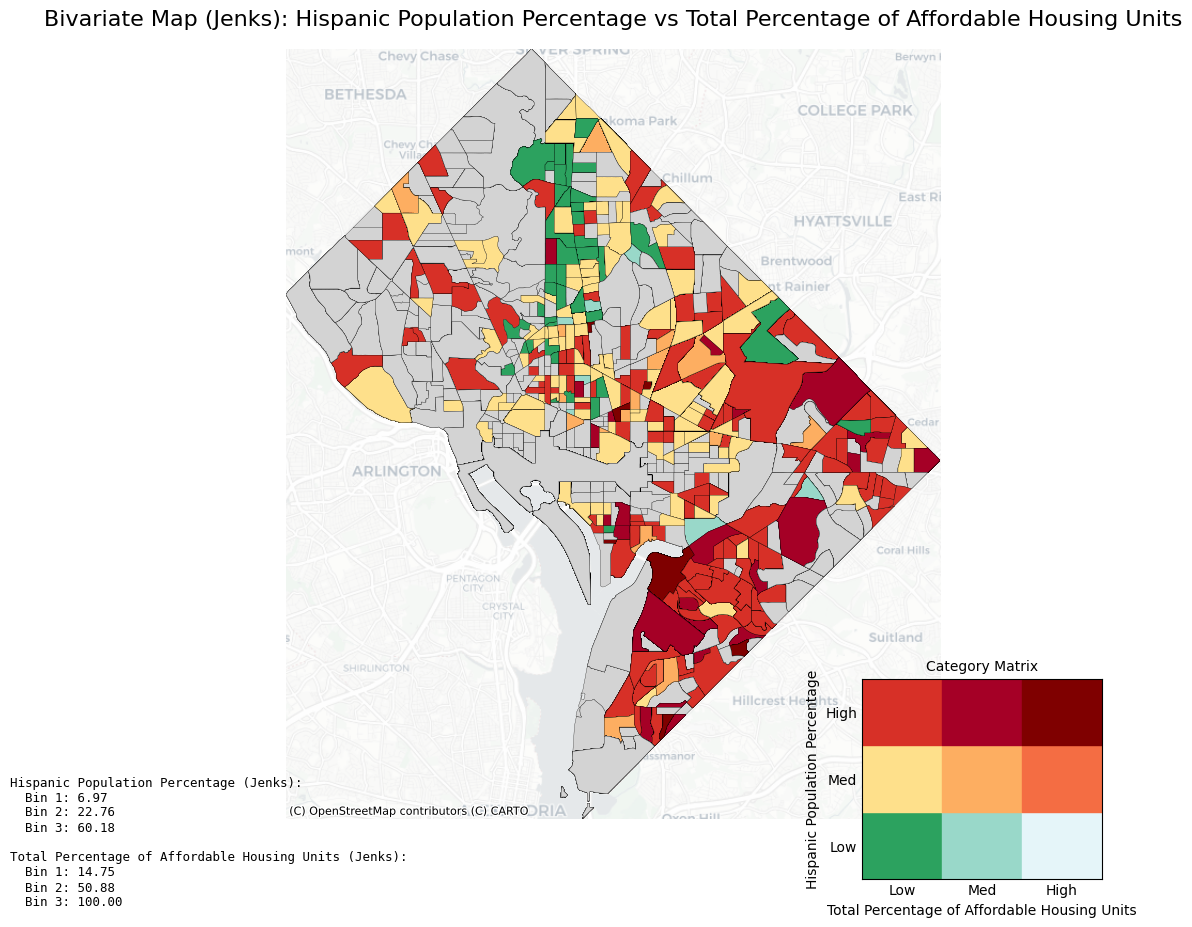

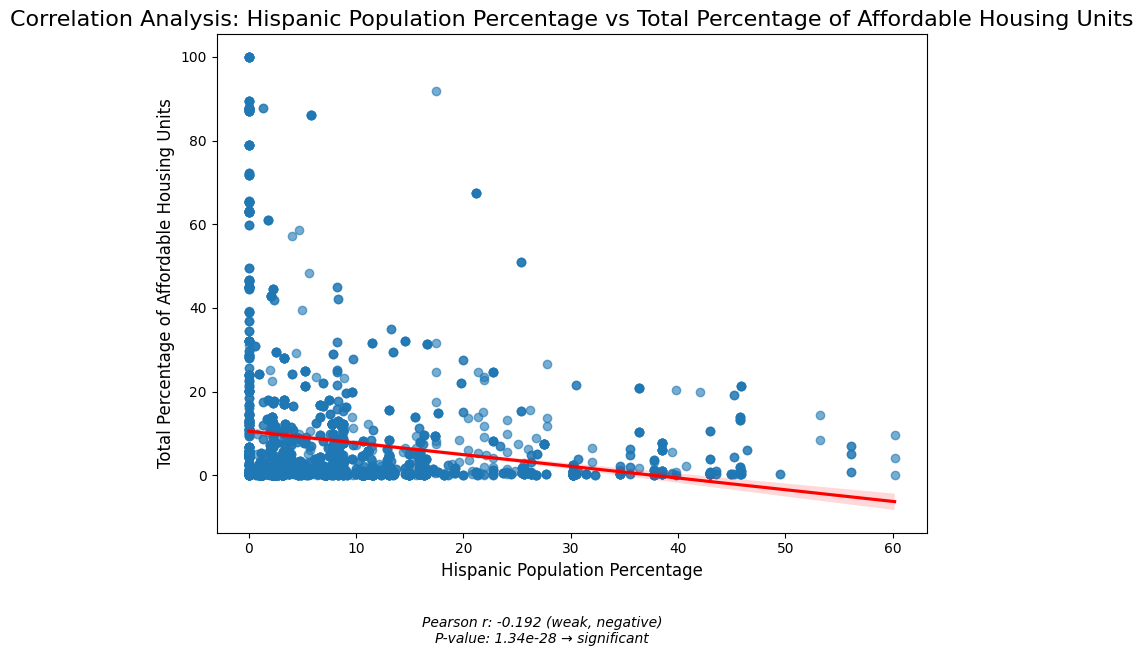

In [24]:
# 30. Create a bivariate choropleth map with Natural breaks (jenks) 
# for hispanic population percentage and total affordable housing units 

bivar_map_total = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Total Percentage of Affordable Housing Units", figsize=(12, 10), save_path="bivar_map_total.png")
bivar_map_total

# 31. Create a scatter plot
# for hispanic population percentage and total affordable housing units 

scatter_plot_total = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Total Percentage of Affordable Housing Units", save_path="scatter_plot_total.png")
scatter_plot_total

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 27 in order to account for islands.
  skater.solve()


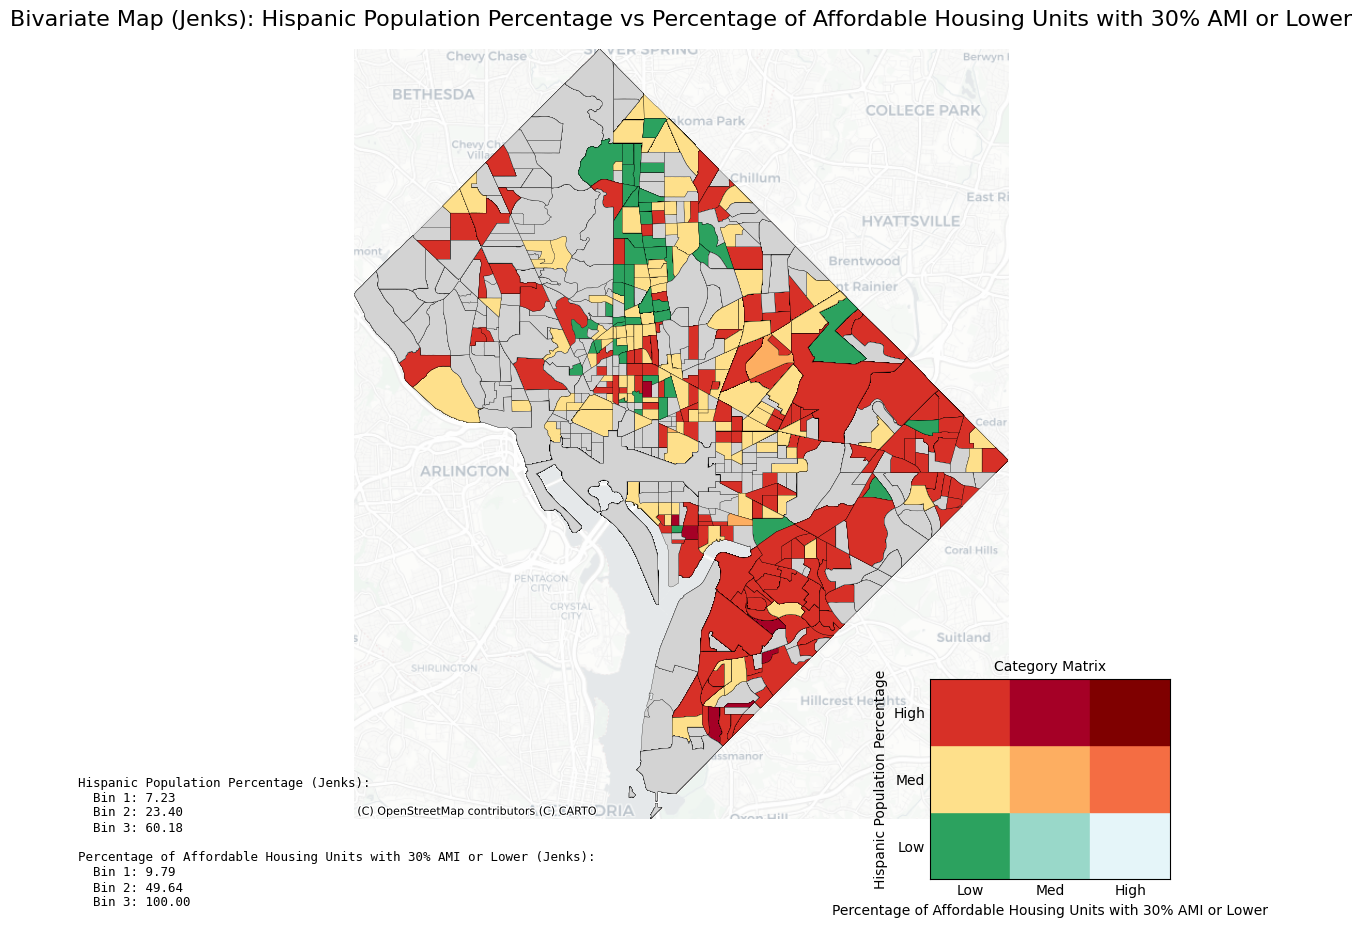

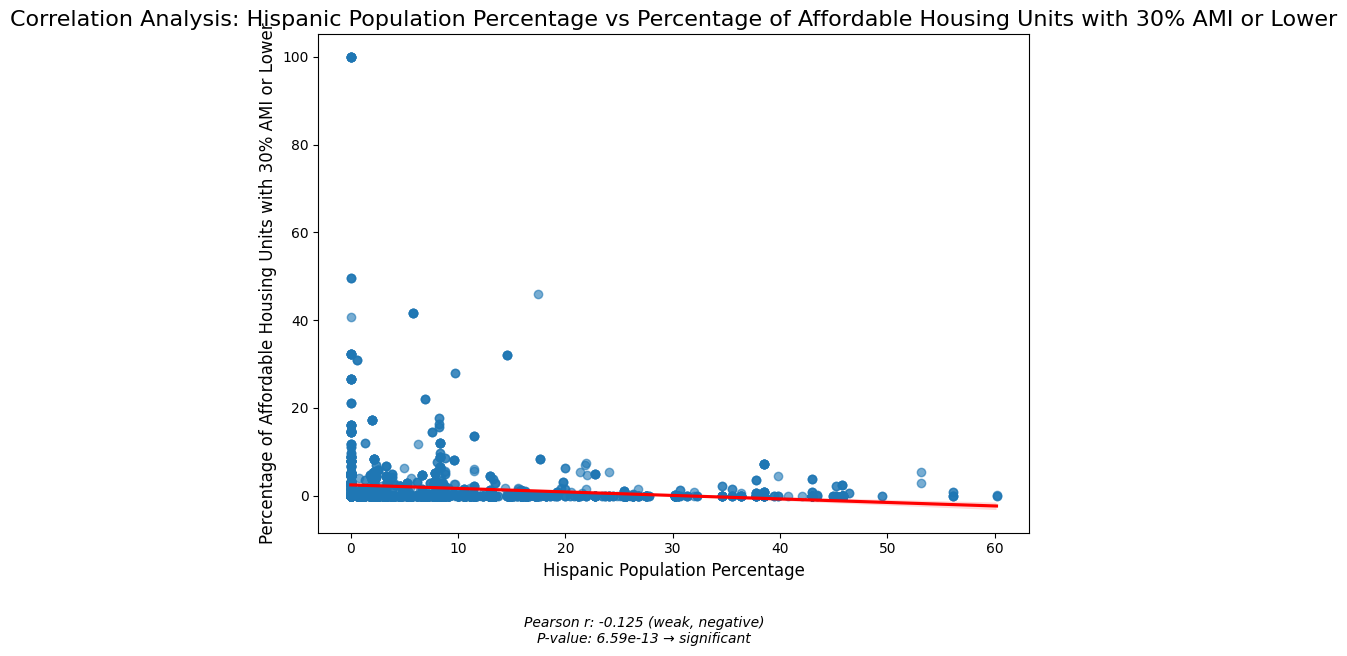

In [25]:
# 32. Create a bivariate choropleth map with Natural breaks (jenks) 
# for hispanic population percentage and affordable housinging units percentage with (0-30% AMI)

bivar_map_ami30 = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 30% AMI or Lower", figsize=(12, 10), save_path="bivar_map_ami30.png")
bivar_map_ami30

# 33. Create a scatter plot
# for hispanic population percentage and affordable housinging units percentage with (0-30% AMI)

scatter_plot_ami30 = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 30% AMI or Lower", save_path="scatter_plot_ami30.png")
scatter_plot_ami30

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 27 in order to account for islands.
  skater.solve()


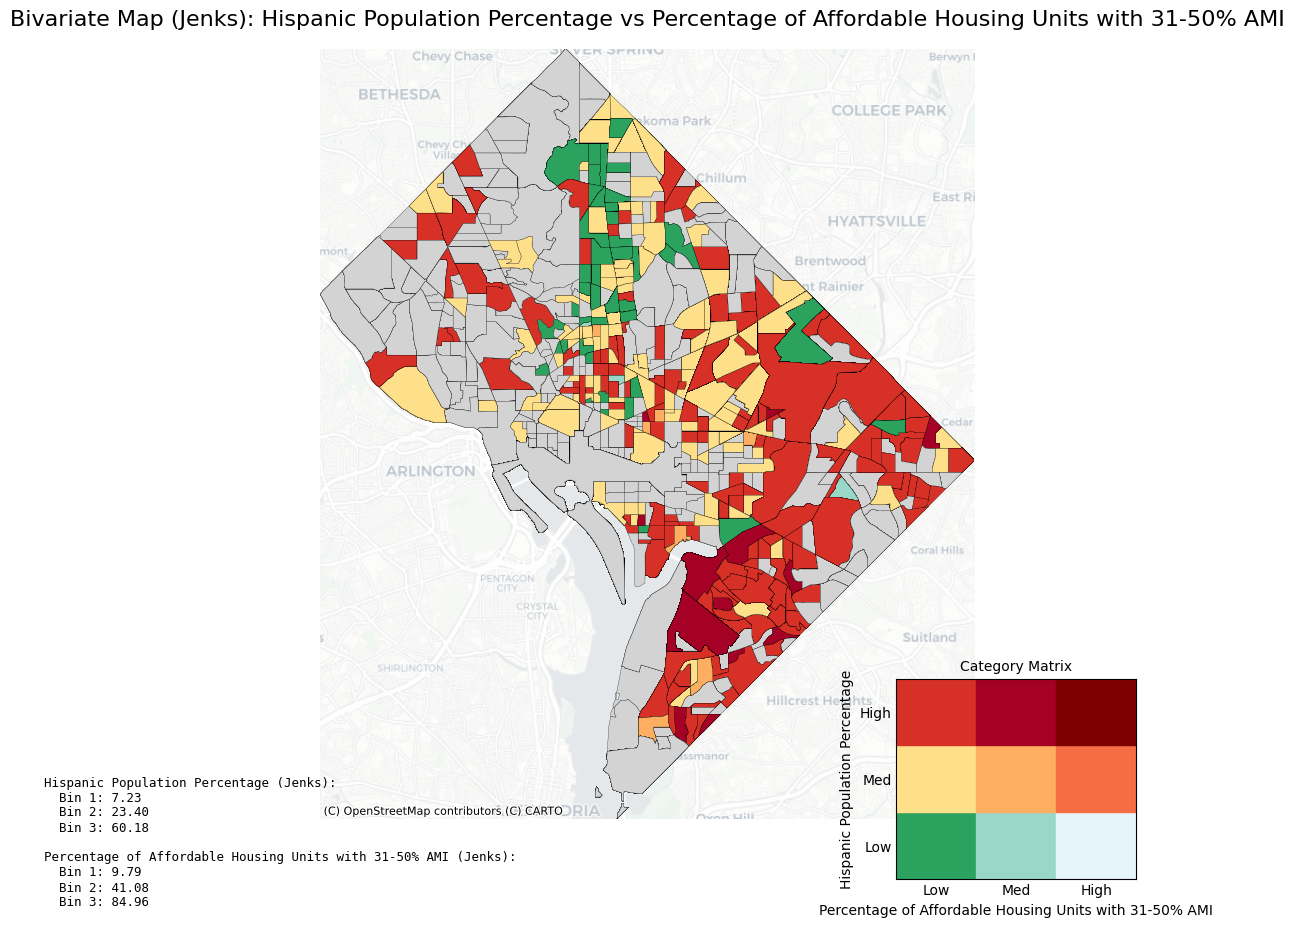

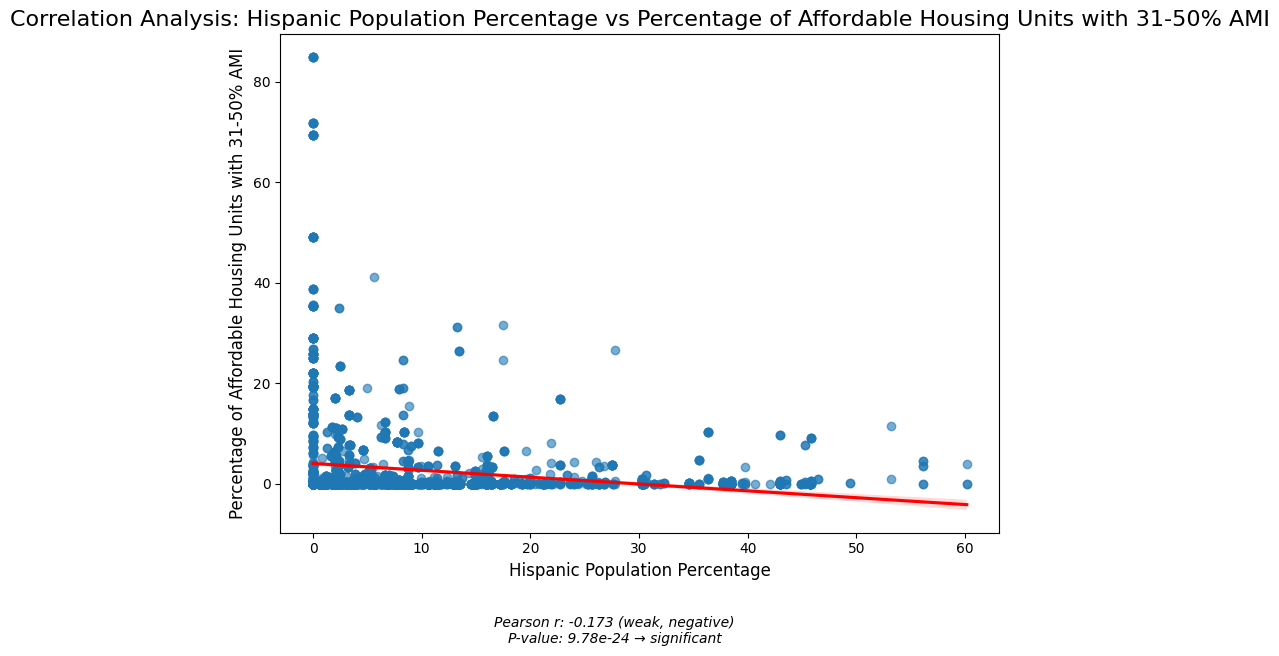

In [26]:
# 34. Create a bivariate choropleth map with Natural breaks (jenks) 
# for hispanic population percentage and affordable housinging units percentage with (31-50% AMI)

bivar_map_ami50 = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 31-50% AMI", figsize=(12, 10), save_path="bivar_map_ami50.png")
bivar_map_ami50

# 35. Create a scatter plot
# for hispanic population percentage and affordable housinging units percentage with (31-50% AMI)

scatter_plot_ami50 = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 31-50% AMI", save_path="scatter_plot_ami50.png")
scatter_plot_ami50

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 27 in order to account for islands.
  skater.solve()


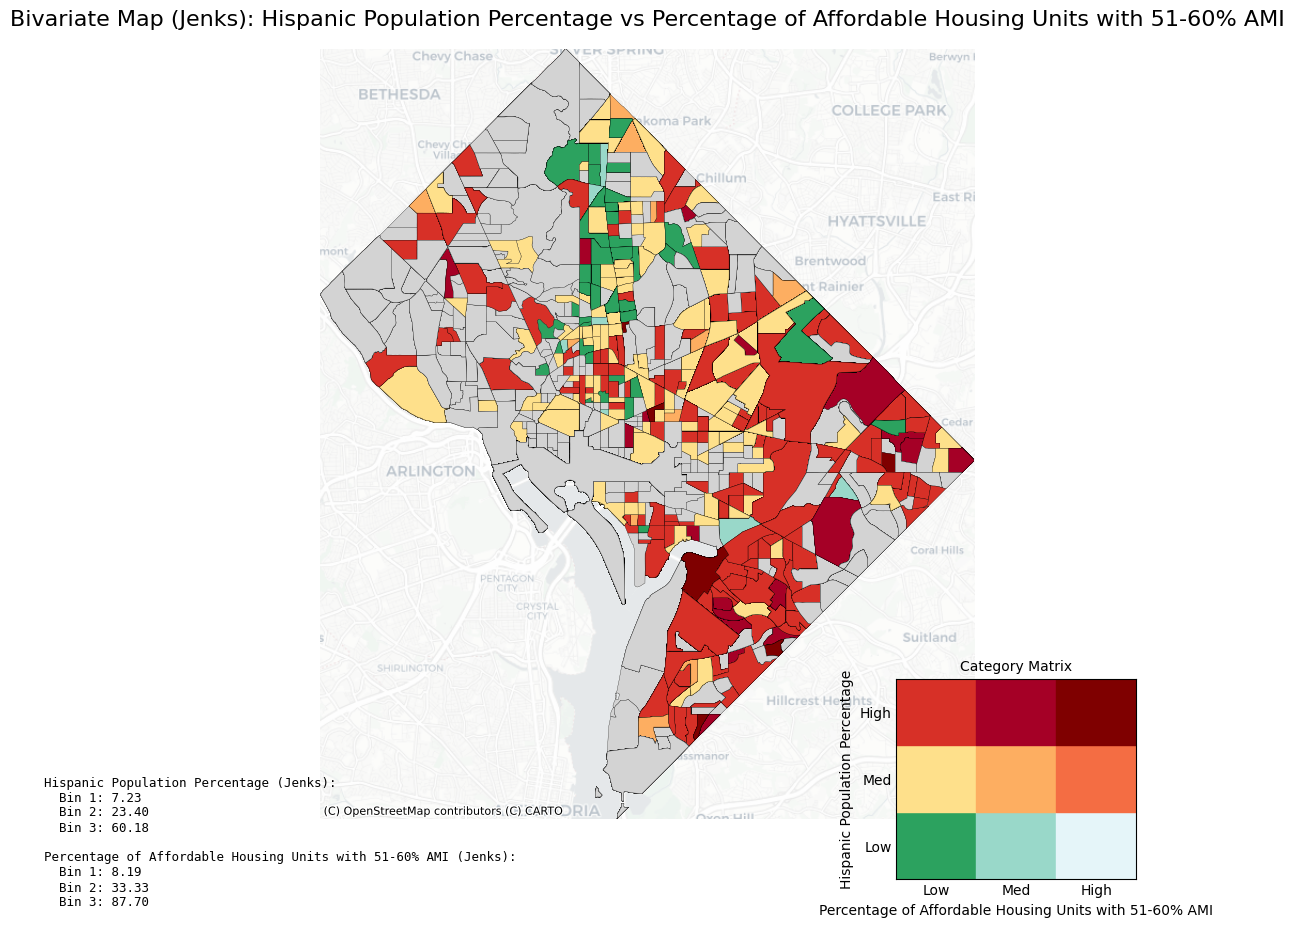

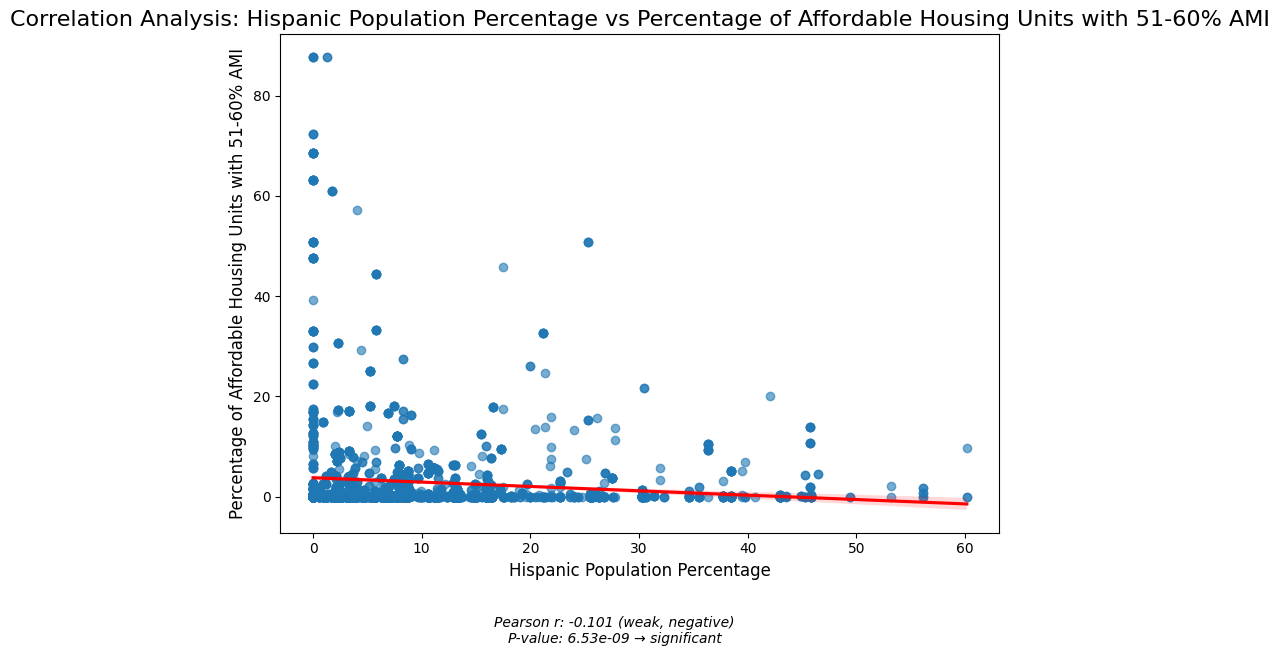

In [27]:
# 36. Create a bivariate choropleth map with Natural breaks (jenks) 
# for hispanic population percentage and affordable housinging units percentage with (51-60% AMI)

bivar_map_ami60 = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 51-60% AMI", figsize=(12, 10), save_path="bivar_map_ami60.png")
bivar_map_ami60

# 37. Create a scatter plot
# for hispanic population percentage and affordable housinging units percentage with (51-60% AMI)

scatter_plot_ami60 = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 51-60% AMI", save_path="scatter_plot_ami60.png")
scatter_plot_ami60

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 27 in order to account for islands.
  skater.solve()


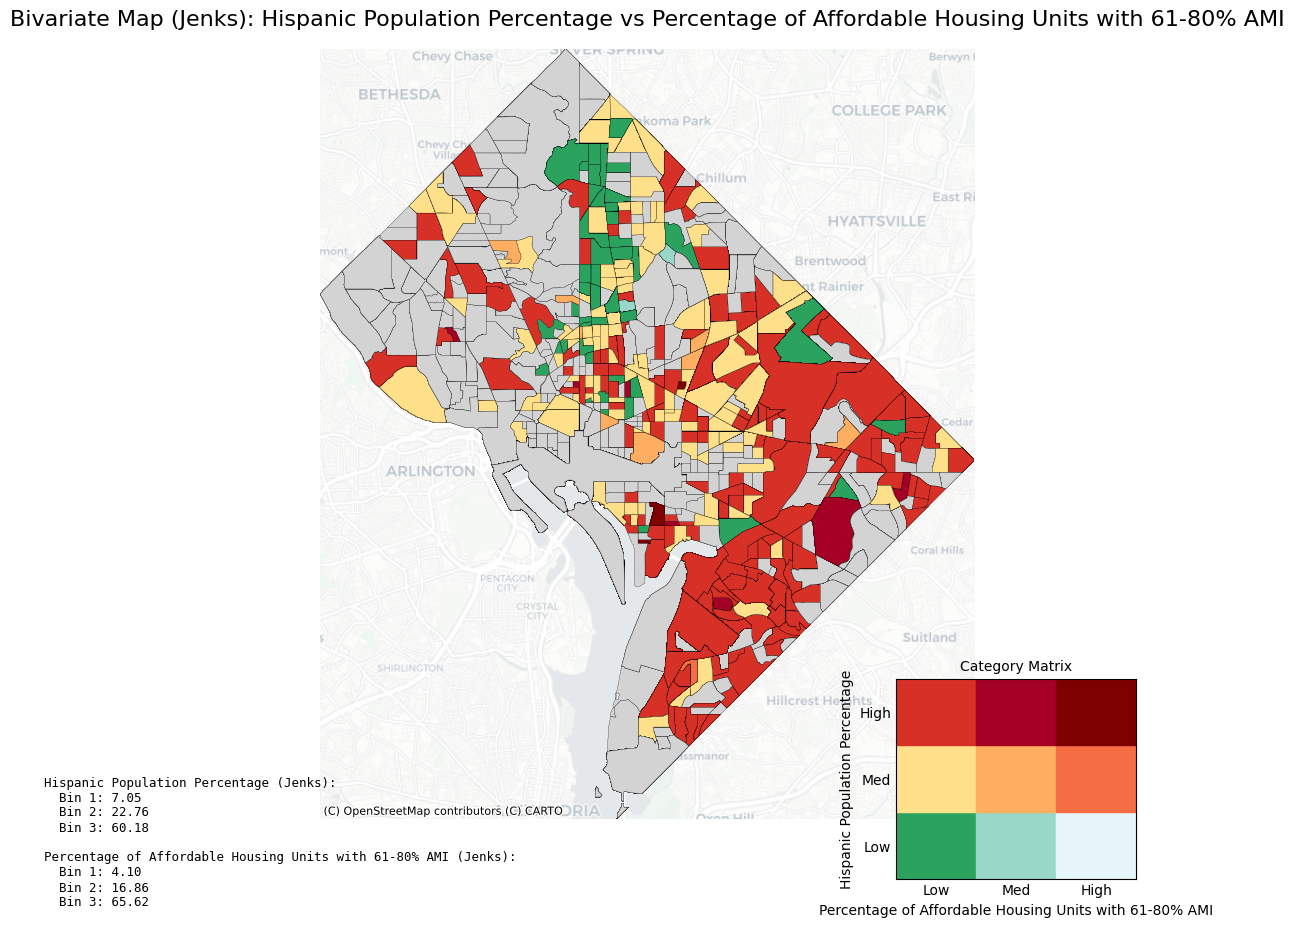

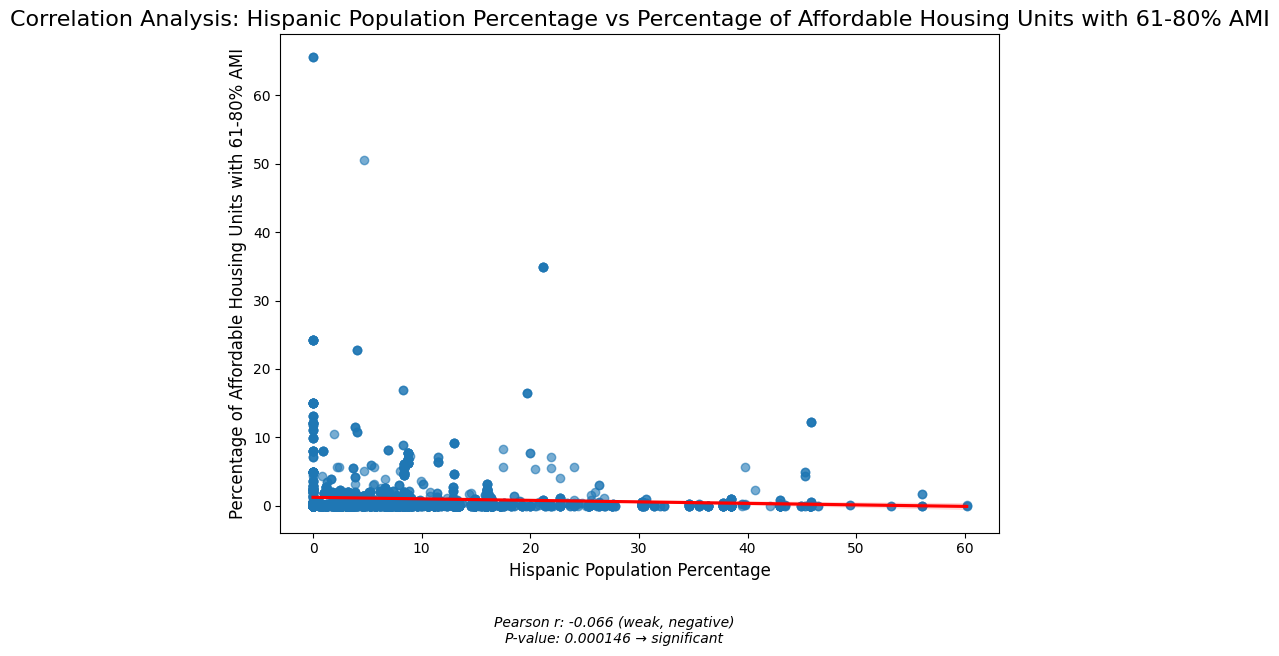

In [28]:
# 38. Create a bivariate choropleth map with Natural breaks (jenks) 
# for hispanic population percentage and affordable housinging units percentage with (61-80% AMI)

bivar_map_ami80 = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 61-80% AMI", figsize=(12, 10), save_path="bivar_map_ami80.png")
bivar_map_ami80

# 39. Create a scatter plot
# for hispanic population percentage and affordable housinging units percentage with (61-80% AMI)

scatter_plot_ami80 = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 61-80% AMI", save_path="scatter_plot_ami80.png")
scatter_plot_ami80

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/opt/miniconda3/envs/688y/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There is 1 island with id: 957.
  W.__init__(self, neighbors, ids=ids, **kw)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 57 in order to account for islands.
  skater.solve()


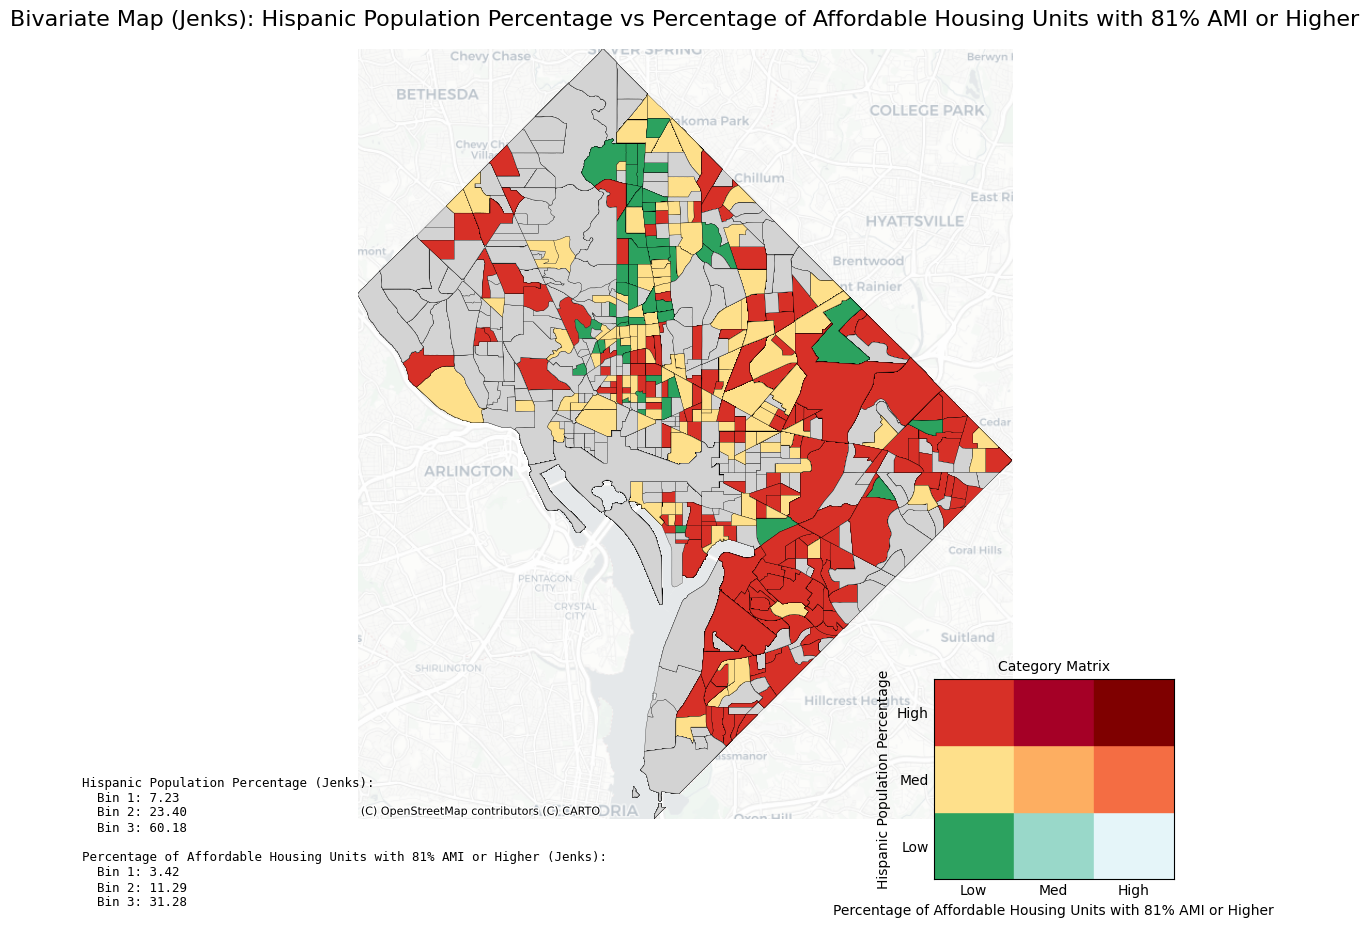

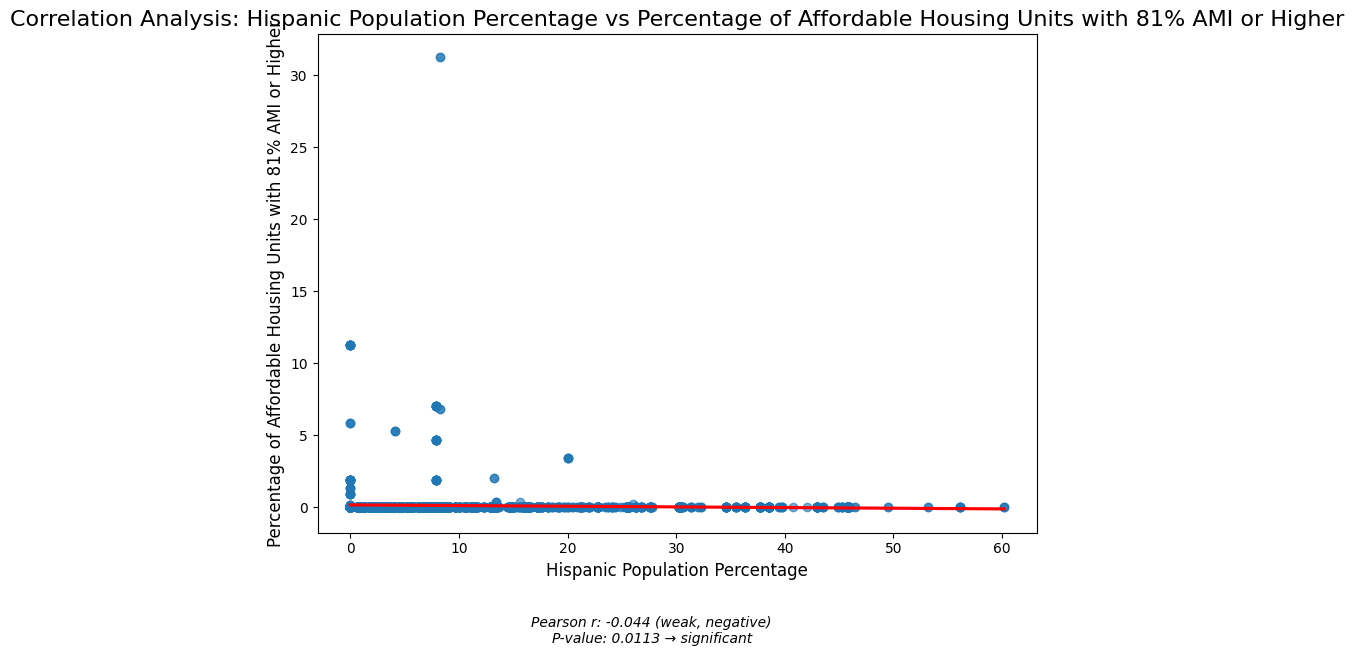

In [29]:
# 40. Create a bivariate choropleth map with Natural breaks (jenks) 

# for hispanic population percentage and affordable housinging units percentage with (>81% AMI)

bivar_map_ami81_up = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 81% AMI or Higher", figsize=(12, 10), save_path="bivar_map_ami81_up.png")
bivar_map_ami81_up

# 41. Create a scatter plot

# for hispanic population percentage and affordable housinging units percentage with (>81% AMI)

scatter_plot_ami81_up = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Percentage of Affordable Housing Units with 81% AMI or Higher", save_path="scatter_plot_ami81_up.png")
scatter_plot_ami81_up

In [30]:
# For the Transit frequency analysis, first we change the column labels to make them understandable

# 42. Rename specific columns
wdc_cbg_2023_aff_hous_transit_sjoin = wdc_cbg_2023_aff_hous_transit_sjoin.rename(columns={
    'f_wd': "Average Number of Weekday Trips",
    'f_we': "Average Number of Weekend-day Trips",
    'f_bus': "Average Number of Trips by Bus",
    'f_wd_bus': "Average Number of Weekday Trips by Bus",
    'f_we_bus': "Average Number of Weekend-day Trips by Bus",
    'f_rail': "Average Number of Trips by Train",
    'f_wd_rail': "Average Number of Weekday Trips by Train",
    'f_we_rail': "Average Number of Weekend-day Trips by Train"
})

# Check results
wdc_cbg_2023_aff_hous_transit_sjoin.head()

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   
0  G11000100001011      11      001  000101        1  110010001011   

                 GEOIDFQ       NAMELSAD  MTFCC FUNCSTAT  ...  \
0  1500000US110010001011  Block Group 1  G5030        S  ...   
0  1500000US110010001011  Block Group 1  G5030        S  ...   
0  1500000US110010001011  Block Group 1  G5030        S  ...   
0  1500000US110010001011  Block Group 1  G5030        S  ...   
0  1500000US110010001011  Block Group 1  G5030        S  ...   

   Average Number of Weekend-day Trips by Train  f_we_other  providers  \
0                                           0.0         0.0        2.0   
0                                           0.0         0.0        1.0   
0                                           0.0         0.0        1.0   
0                                           0.0         0.0        1.0   
0                                           0.0         0.0        1.0   

   Hispanic Population Percentage  \
0                             NaN   
0                             NaN   
0                             NaN   
0                             NaN   
0                             NaN   

   Total Percentage of Affordable Housing Units  \
0                                           NaN   
0                                           NaN   
0                                           NaN   
0                                           NaN   
0                                           NaN   

  Percentage of Affordable Housing Units with 30% AMI or Lower  \
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             

   Percentage of Affordable Housing Units with 31-50% AMI  \
0                                                NaN        
0                                                NaN        
0                                                NaN        
0                                                NaN        
0                                                NaN        

  Percentage of Affordable Housing Units with 51-60% AMI  \
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       

  Percentage of Affordable Housing Units with 61-80% AMI  \
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       
0                                                NaN       

  Percentage of Affordable Housing Units with 81% AMI or Higher  
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             
0                                                NaN             

[5 rows x 155 columns]

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)


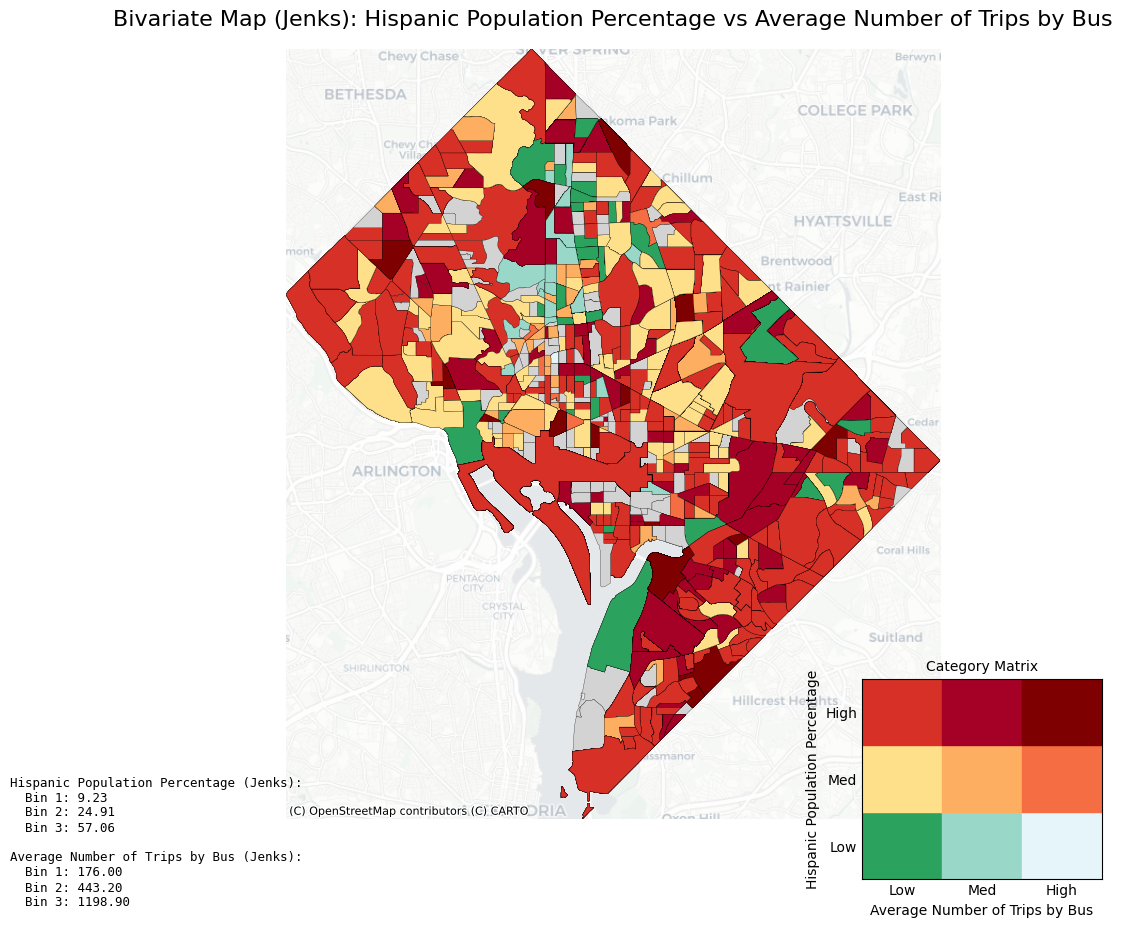

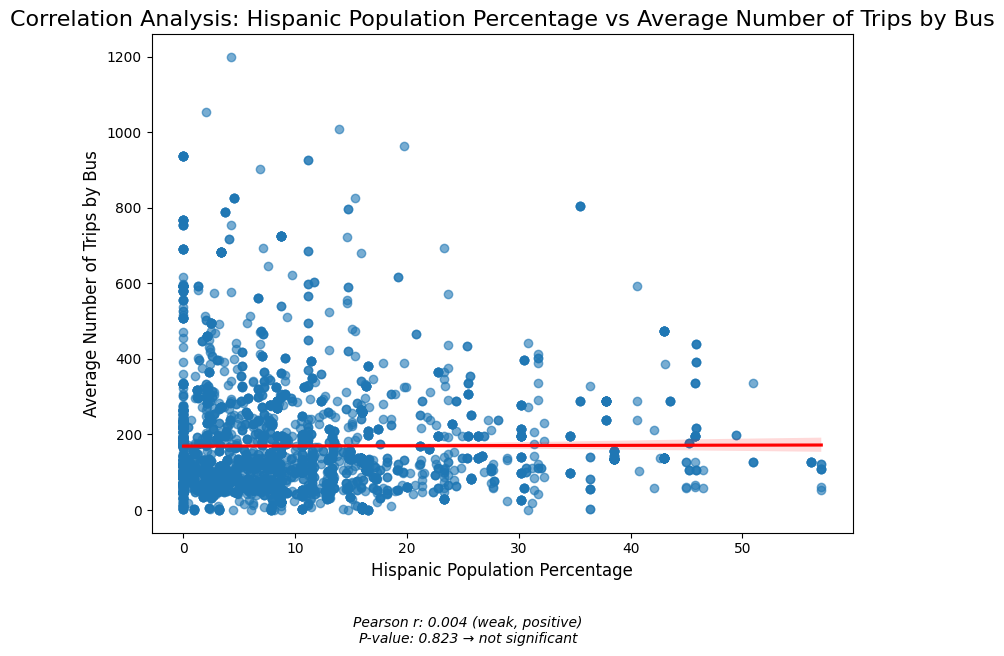

In [31]:
# 43. Create a bivariate choropleth map with Natural breaks (jenks) 


# for hispanic population percentage and annual weekly average bus trips

bivar_map_transit_bus = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Average Number of Trips by Bus", figsize=(12, 10), save_path="bivar_map_transit_bus.png")
bivar_map_transit_bus

# 44. Create a scatter plot

# for hispanic population percentage and annual weekly average bus trips

scatter_plot_transit_bus = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Average Number of Trips by Bus", save_path="scatter_plot_transit_bus.png")
scatter_plot_transit_bus

/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:200: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(valid_gdf)
/Users/huckleberrypablo/Documents/GitHub/ursp688y_sp2025/exercises/final project pablo_V3/data_prep.py:202: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 9 to 21 in order to account for islands.
  skater.solve()


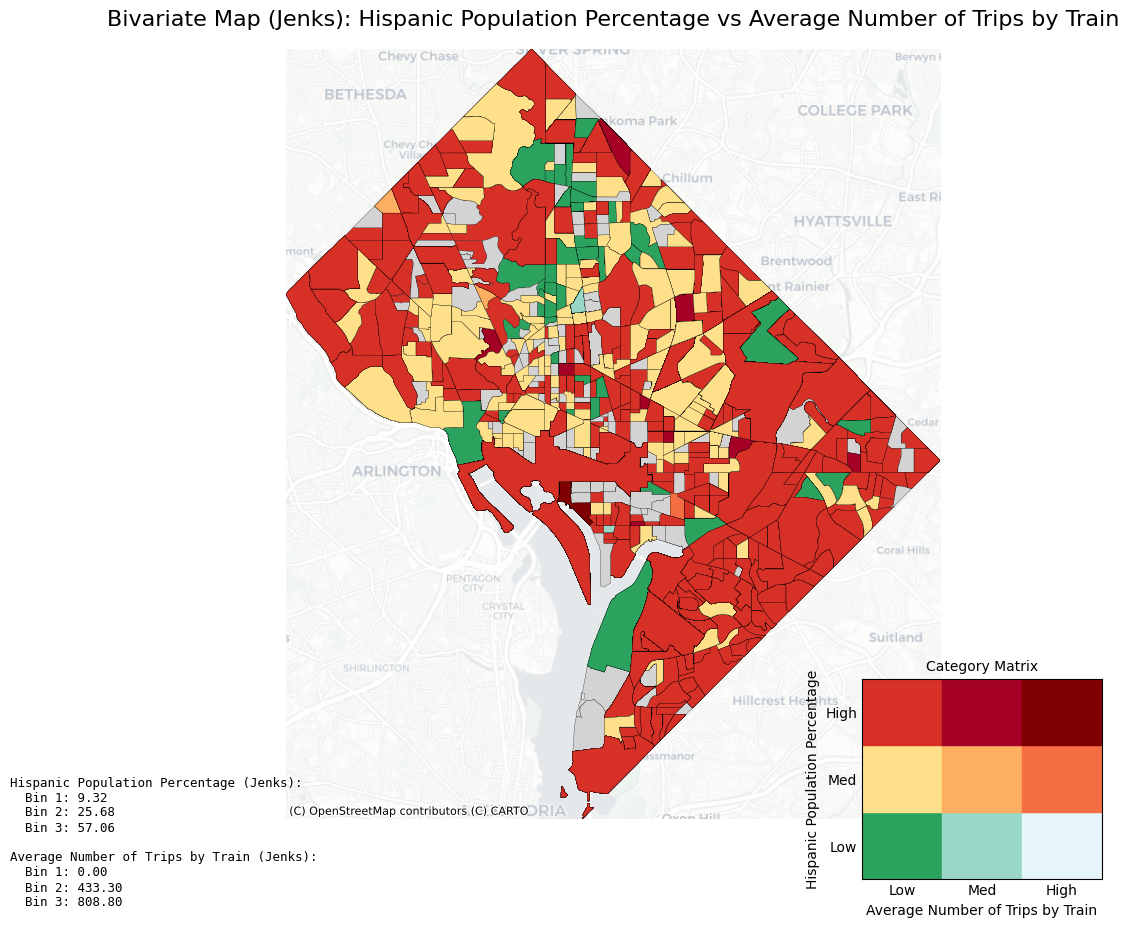

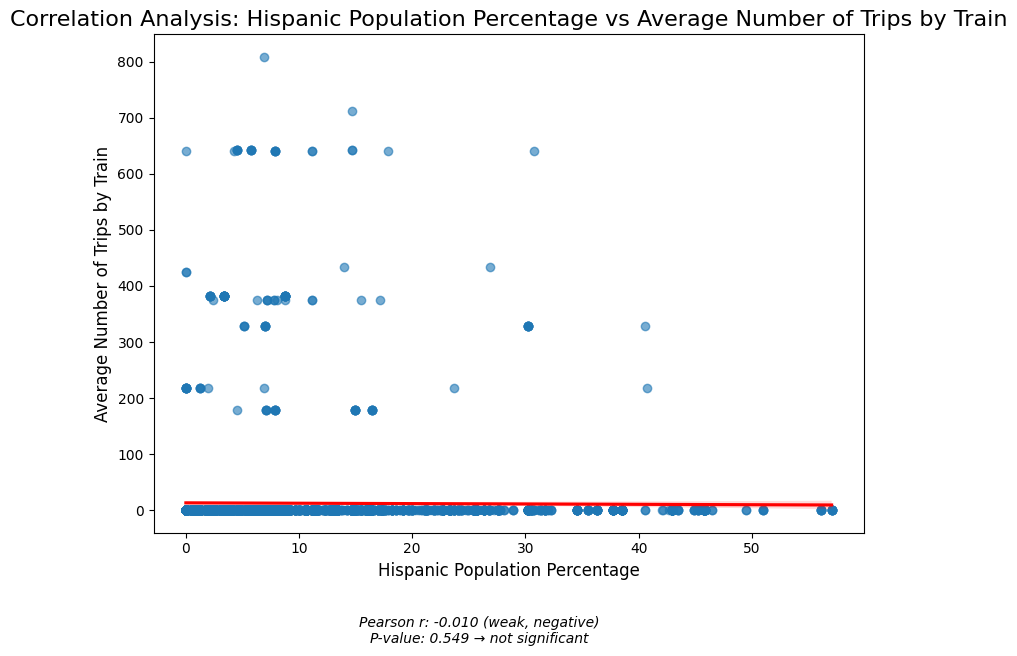

In [32]:
# 45. Create a bivariate choropleth map with Natural breaks (jenks) 

# for hispanic population percentage and annual weekly average rail trips

bivar_map_transit_train = data_prep.bivariate_skater_map_jenks(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Average Number of Trips by Train", figsize=(12, 10), save_path="bivar_map_transit_train.png")
bivar_map_transit_train

# 46. Create a scatter plot

# for hispanic population percentage and annual weekly average rail trips

scatter_plot_transit_train = data_prep.scatter_with_trend_and_correlation(wdc_cbg_2023_aff_hous_transit_sjoin, "Hispanic Population Percentage", "Average Number of Trips by Train", save_path="scatter_plot_transit_train.png")
scatter_plot_transit_train

In [33]:
#CONCLUSIONS

# The results of this spatial analysis reveal a clear mismatch between where affordable housing is located 
# and where Hispanic populations are concentrated in Washington, D.C. Most block groups with high percentages 
# of Hispanic residents do not have a high number of affordable housing units, especially those at higher AMI 
# levels. Additionally, access to high-frequency transit, particularly Metrorail, is limited in these areas. 
# While some affordable units and bus routes reach Hispanic communities, the distribution is uneven and raises 
# concerns about equity in planning and resource allocation. The bivariate choropleth map helped visualize these 
# disparities, showing that neighborhoods with high need are often underserved. These findings suggest that more 
# intentional housing and transit policies are needed to support inclusive development across the city.

In [34]:
# THE END